In [53]:
from importlib import reload
import magnitude
reload(magnitude)
from magnitude import *
import function_utils
reload(function_utils)
from function_utils import *
import summaries
reload(summaries)
from summaries import *
import magnitude_dimension
reload(magnitude_dimension)
from magnitude_dimension import *
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_swiss_roll

In [69]:
from distances import distances_isomap
X = np.random.normal(0,1,size=(100,2))

In [70]:
distances_isomap(X, n_comps=10)

array([[0.        , 0.33419095, 1.42768841, ..., 0.77112175, 0.50177376,
        1.83564067],
       [0.33419095, 0.        , 1.09349746, ..., 1.10531271, 0.83596472,
        1.9969552 ],
       [1.42768841, 1.09349746, 0.        , ..., 1.87782461, 1.92946218,
        2.59025791],
       ...,
       [0.77112175, 1.10531271, 1.87782461, ..., 0.        , 0.43878505,
        1.77477594],
       [0.50177376, 0.83596472, 1.92946218, ..., 0.43878505, 0.        ,
        1.88624997],
       [1.83564067, 1.9969552 , 2.59025791, ..., 1.77477594, 1.88624997,
        0.        ]])

In [74]:
np.geomspace(0.01, 10, 10)

array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ])

In [73]:
distances_isomap(X, n_comps=2)

array([[0.        , 0.33419095, 1.42768841, ..., 0.77112175, 0.50177376,
        1.83564067],
       [0.33419095, 0.        , 1.09349746, ..., 1.10531271, 0.83596472,
        1.9969552 ],
       [1.42768841, 1.09349746, 0.        , ..., 1.87782461, 1.92946218,
        2.59025791],
       ...,
       [0.77112175, 1.10531271, 1.87782461, ..., 0.        , 0.43878505,
        1.77477594],
       [0.50177376, 0.83596472, 1.92946218, ..., 0.43878505, 0.        ,
        1.88624997],
       [1.83564067, 1.9969552 , 2.59025791, ..., 1.77477594, 1.88624997,
        0.        ]])

In [54]:
# Do we want to be assuming the one-point property for magnitude functions / magnitude weights / magnitude dimension profiles?
# Do we want to skip over singularities? Record that information somewhere? Or not allow for any singularities?
# Do we want to remove duplicates or give an error?
# 

In [55]:
X, _= make_swiss_roll(100)
X2 = np.random.normal(0,1,size=(100,2))

In [76]:
n_ts=1000
mag, ts = compute_magnitude(X, n_ts=n_ts, log_scale = True)
mag2, ts2 = compute_magnitude(X2, n_ts=n_ts, log_scale = True)

In [80]:
mag.shape

(1000,)

In [77]:
weights, ts = compute_magnitude(X, n_ts=n_ts, log_scale = True, get_weights=True)
weights2, ts2 = compute_magnitude(X2, n_ts=n_ts, log_scale = True, get_weights=True)

In [79]:
weights.shape

(100, 1000)

In [57]:
D = get_dist(X)
D2 = get_dist(X2)

In [58]:
#D1=np.array([[0,1], [1,0]])
#mag1, ts1 = compute_magnitude_until_convergence(D1, n_ts=n_ts, log_scale = True, target_value=1.999)
#plt.plot(ts1, mag1)

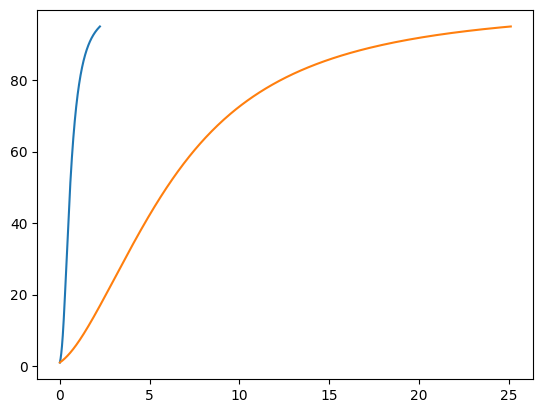

In [59]:
plt.plot(ts, mag)
plt.plot(ts2, mag2)

67.12871252494068

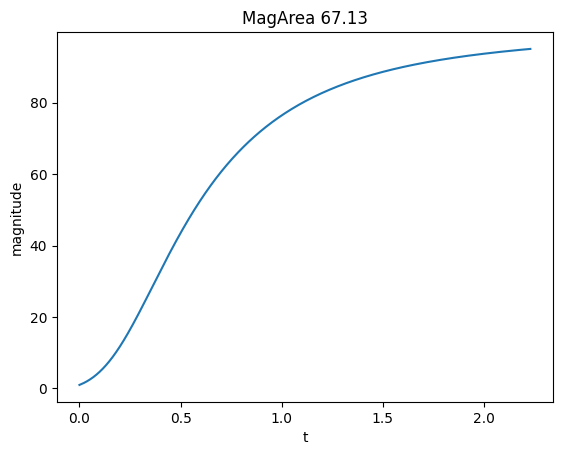

In [60]:
mag_area(mag, ts, D=None, plot=True, #normalise_by_cardinality=False, 
            scale=True, integration="trapz", absolute_area=True, t_cut=None)

68.56201472359277

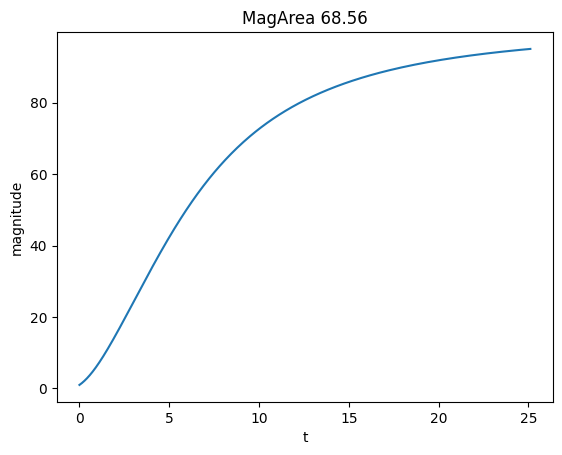

In [61]:
mag_area(mag2, ts2, D=None, plot=True, #normalise_by_cardinality=False, 
            scale=True, integration="trapz", absolute_area=True, t_cut=None)

64.28684207239473

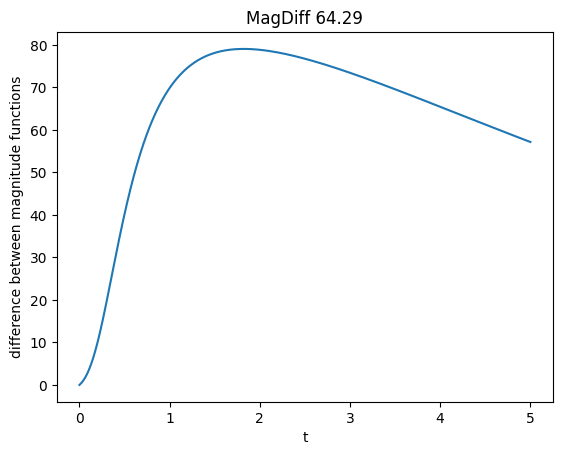

In [62]:
mag_diff(mag, ts, D, mag2, ts2, D2, method="cholesky", t_cut=5, exact=False, 
            integration="simpson", absolute_area=True, scale=True, plot=True)

64.66411229662273

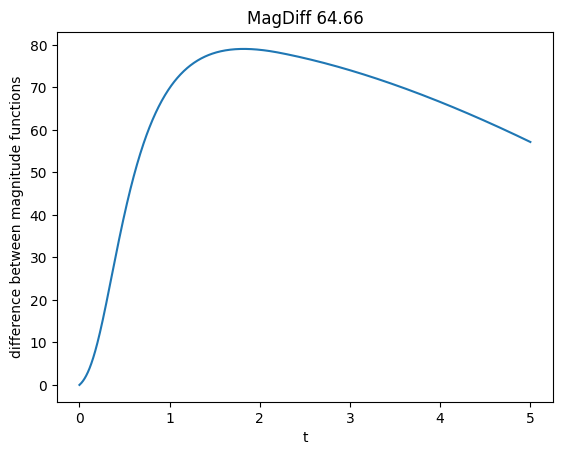

In [63]:
mag_diff(mag, ts, D, mag2, ts2, D2, method="cholesky", t_cut=5, exact=True, 
            integration="simpson", absolute_area=True, scale=True, plot=True)

1.5279505403276954

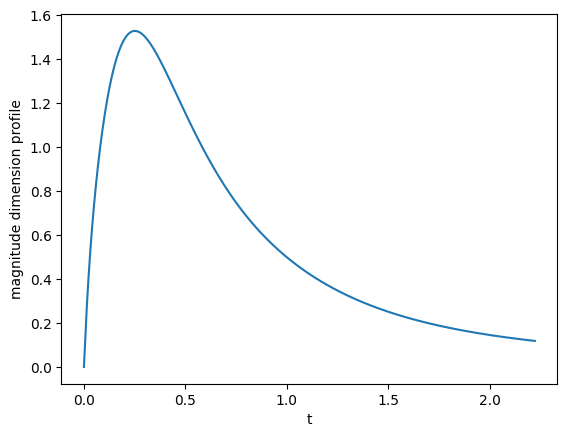

In [64]:
dim_profile, ts_dim = magitude_dimension_profile(mag, ts)
plot_magnitude_dimension_profile(dim_profile, ts_dim)
magnitude_dimension(dim_profile)

1.2158596628971958

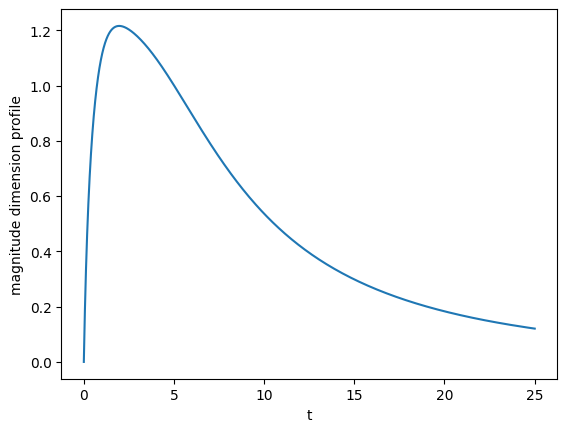

In [65]:
dim_profile2, ts_dim2 = magitude_dimension_profile(mag2, ts2)
plot_magnitude_dimension_profile(dim_profile2, ts_dim2)
magnitude_dimension(dim_profile2)

-4.101645619903524

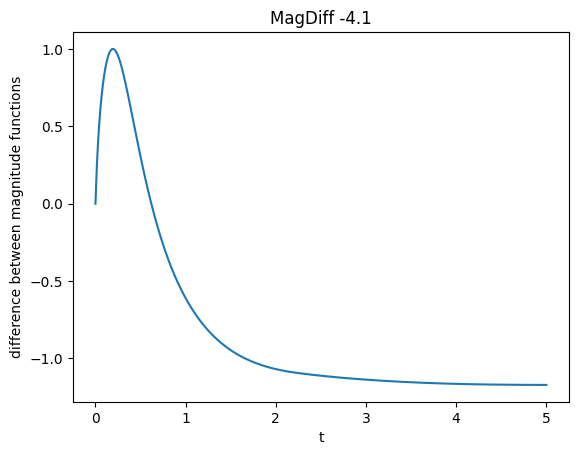

In [66]:
mag_diff(dim_profile, ts_dim, None, dim_profile2, ts_dim2, None, method="cholesky", t_cut=5, exact=False, 
            integration="simpson", absolute_area=False, scale=False, plot=True)

4.101645619903524

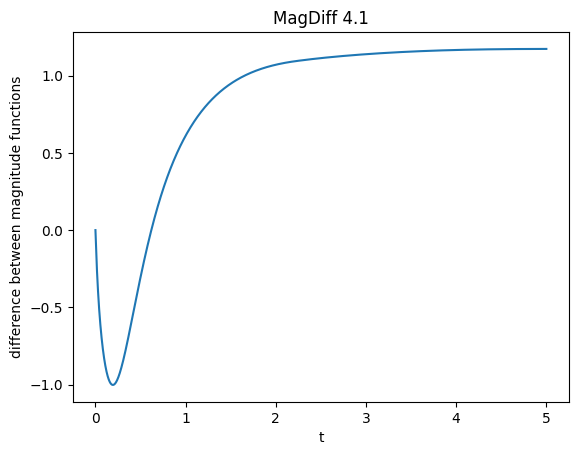

In [67]:
mag_diff(dim_profile2, ts_dim2, None, dim_profile, ts_dim, None, method="cholesky", t_cut=5, exact=False, 
            integration="simpson", absolute_area=False, scale=False, plot=True)